In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import seaborn as sns

from sklearn.pipeline import make_pipeline

In [25]:
#dfd = pd.read_csv("CSVs\dfdd.csv")
#dfd.index = dfd['Unnamed: 0'].values
#del dfd['Unnamed: 0']

#dfc = pd.read_csv("CSVs\dfcc.csv")
#dfc.index = dfc['Unnamed: 0'].values
#del dfc['Unnamed: 0']

In [26]:
dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/sraniestarni.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/sraniestarnismerti.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfdsrn.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']

dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfcsrn.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

In [27]:
#corlist = dfc.columns
#dfcsr = dfc.copy(deep=True)
#dfdsr = dfd.copy(deep=True)
#for i in corlist:
#    for j in range(706):
#        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
#for i in corlist:
#    for j in range(706):
#        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

In [28]:
dfc['Russia']

1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
        ...   
703    32374.0
704    32013.0
705    31569.0
706    30546.0
707    30228.0
Name: Russia, Length: 706, dtype: float64

In [29]:
#dfcsr.drop(dfcsr.head(10).index,inplace=True)
#dfcsr.drop(dfcsr.tail(10).index,inplace=True)

In [30]:
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(1,707)]

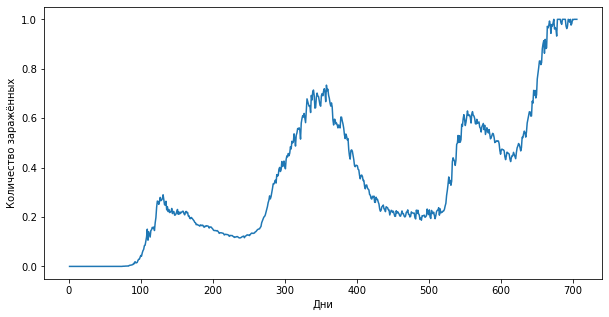

In [31]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [32]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

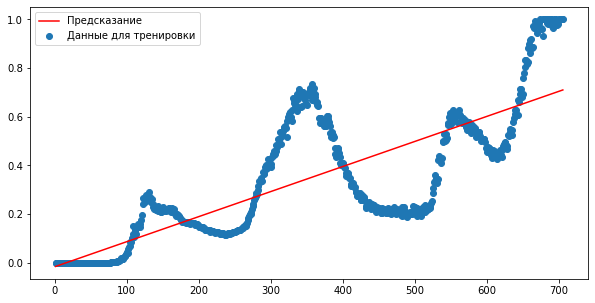

In [33]:
plt.figure(figsize=(10,5))
plt.scatter(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

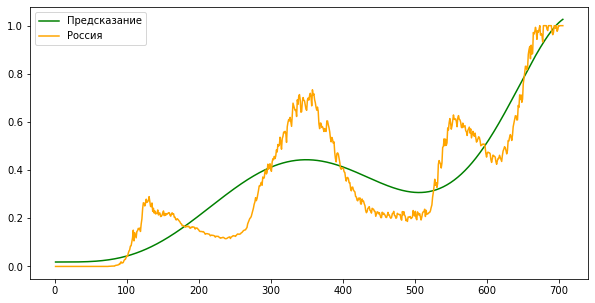

[0.1206675528348006]

In [39]:
rmses = []
#enumerate = [i for i in range(10)]
enumerate = [8]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), 706).reshape(706,1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis_, y_pred_lr, label='Предсказание', c='green')
    plt.plot(xaxis, yaxis, label='Россия', c='orange')
#    plt.plot(xaxis, dfcsr['United Kingdom'].values, label='Англия', c='red')
#    plt.plot
#    plt.plot
#    plt.plot
#    plt.plot
    plt.legend()
    plt.show()
    #print(p.fit_transform(xaxis_))
    modelo = make_pipeline(p, lr)
    #print(modelo.steps[1][1].coef_)
    #print(modelo.steps[1][1].intercept_)
rmses

In [123]:
print ('x', '**', 0, '*', 0.01839563742720174)
for i in range (1,11):
    print('x', '**', i, '*', modelo.steps[1][1].coef_[i])

x ** 0 * 0.01839563742720174
x ** 1 * 3.5920200896651027e-17
x ** 2 * 9.741083458856141e-21
x ** 3 * 2.2445414249052145e-21
x ** 4 * 4.83706246572453e-19
x ** 5 * 8.158434998431723e-17
x ** 6 * 8.370024056683463e-15
x ** 7 * -5.628625852735983e-17
x ** 8 * 1.4148178302838865e-19
x ** 9 * -1.573155216248503e-22
x ** 10 * 6.527378390919811e-26


In [90]:
for x in range(2,3):
    a = x ** 0 * 0.01839563742720174
    a1 = x ** 1 * 3.4559141396726776e-13
    a2 = x ** 2 * 3.166544942470755e-14
    a3 = x ** 3 * 4.9332483156101644e-12
    a4 = x ** 4 * 4.576555808758386e-10
    a5 = x ** 5 * -2.5767777053585735e-12
    a6 = x ** 6 * 5.315548726019046e-15
    a7 = x ** 7 * -4.676114057353093e-18
    a8 = x ** 8 * 1.455664830651917e-21
    print(a + a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8)

0.018395644707857577


In [69]:
modelo.steps[1][1].coef_[1]

3.4559141396726776e-13

In [128]:
x = 709
a = 0
for i in range (1,11):
    a = ((x ** (i)) * modelo.steps[1][1].coef_[i]) + a 
a = a + modelo.steps[1][1].intercept_
print(a)

1.3153550208243532


In [84]:
a = 
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

40661.825859019336


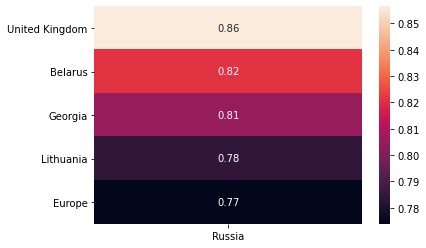

In [20]:
lisc = list(dfcsr.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfcsr.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [21]:
cd

,Russia
United Kingdom,0.856483
Belarus,0.821270
Georgia,0.805180
Lithuania,0.784234
Europe,0.773894


In [22]:
y = dfcsr['Russia'].values
Val = [dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values]

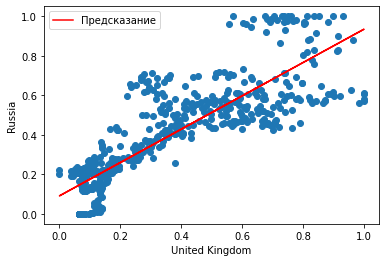

In [23]:
for i in range(1):
    x1p = np.reshape(Val[i], (-1, 1))
    lr.fit(x1p, y)
    plt.scatter(Val[i], y)
    plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
    plt.xlabel(cd.index[i])
    plt.ylabel('Russia')
    plt.legend()
    plt.show()

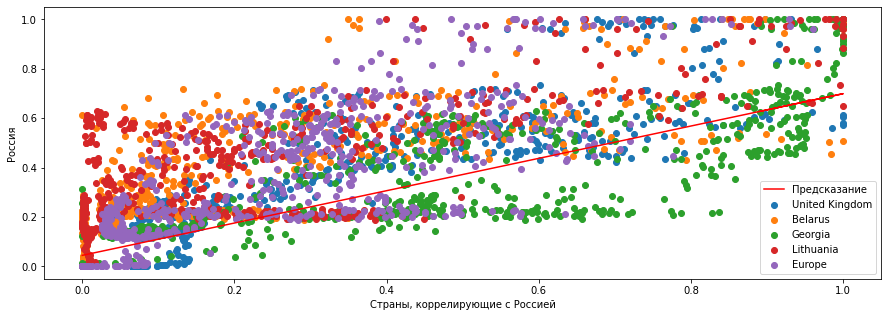

[0.65438083]
0.04484303154646535


In [121]:
x1p = np.reshape(Val[2], (-1, 1))
lr.fit(x1p, y)
plt.figure(figsize=(15,5))
plt.scatter(Val[0], y, label=cd.index[0])
plt.scatter(Val[1], y, label=cd.index[1])
plt.scatter(Val[2], y, label=cd.index[2])
plt.scatter(Val[3], y, label=cd.index[3])
plt.scatter(Val[4], y, label=cd.index[4])
plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
plt.xlabel('Страны, коррелирующие с Россией')
plt.ylabel('Россия')
plt.legend()
plt.show()
print(modelo.steps[1][1].coef_)
print(modelo.steps[1][1].intercept_)

In [119]:
x = 1
a = modelo.steps[1][1].intercept_ + modelo.steps[1][1].coef_ * x
print(a)

[0.69922386]


In [118]:
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

[18604848.87304747]


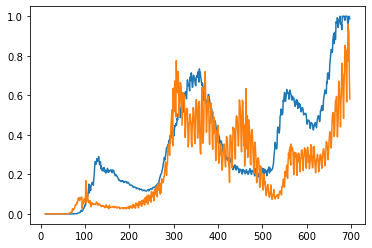

In [25]:
plt.plot(dfcsr['Russia'])
plt.plot(dfcsr['Europe'])
plt.show()